# Quantitative Finance Project: Estimating a Risk Factor Model for a Stock with Live Data

YouTube Tutorial: https://www.youtube.com/watch?v=gN7JOFOO-eM&ab_channel=TechFin

### 1. Factor Data

In [1]:
import pandas_datareader
import matplotlib.pyplot as plt

In [2]:
# To get different risk factor portfolios
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
# To get factors, we need to determine a stock date (go as far as we can)
start = '1926-01-01'

In [4]:
# To get the Fama-French factors since the date, monthly
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M', start=start).read()

In [5]:
# To display the dataframe
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2023-01    6.65  5.02 -4.05  0.35
 2023-02   -2.58  1.21 -0.78  0.34
 2023-03    2.51 -5.59 -9.01  0.36
 2023-04    0.61 -3.34 -0.03  0.35
 2023-05    0.35  1.53 -7.80  0.36
 
 [1163 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.11 -10.34  2.15
 2020   23.66  13.18 -46.56  0.45
 2021   23.56  -3.89  25.53  0.04
 2022  -21.60  -6.82  25.81  1.43
 
 [96 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [6]:
# To get the dataframe of monthly returns for the 3 factors
ff_df = ff[0]
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2023-01,6.65,5.02,-4.05,0.35
2023-02,-2.58,1.21,-0.78,0.34
2023-03,2.51,-5.59,-9.01,0.36


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

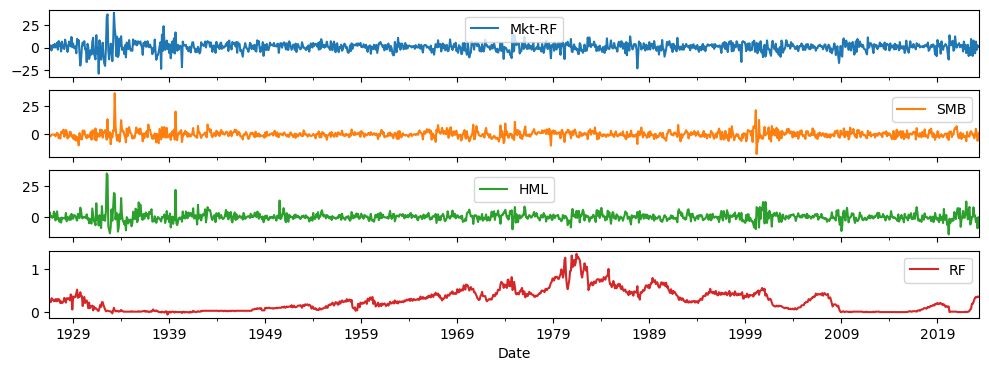

In [7]:
# To plot the actual returns for each factor
ff_df.plot(subplots=True,figsize=(12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

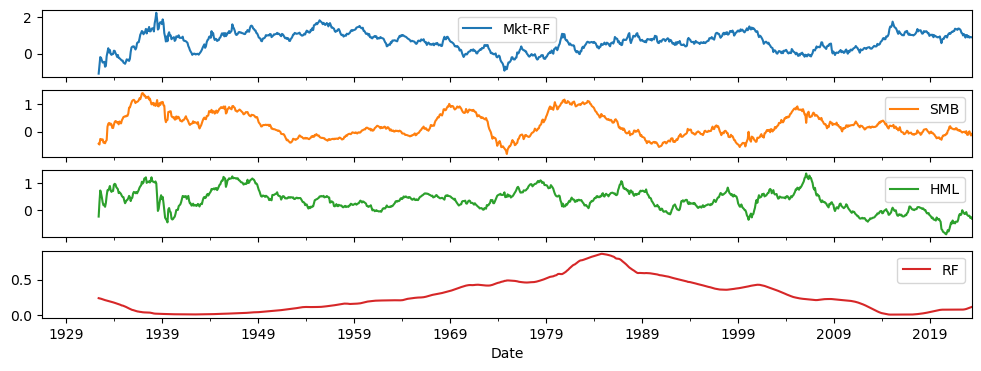

In [8]:
# To plot smooth rolling averages
ff_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

# The market factor and the size factor took a dip in the late 1970s, but have been moving inversely to each other.
# Size and value have somewhat been moving together.

In [9]:
# To add the momentum factor
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M',start=start).read()[0]

array([<Axes: xlabel='Date'>], dtype=object)

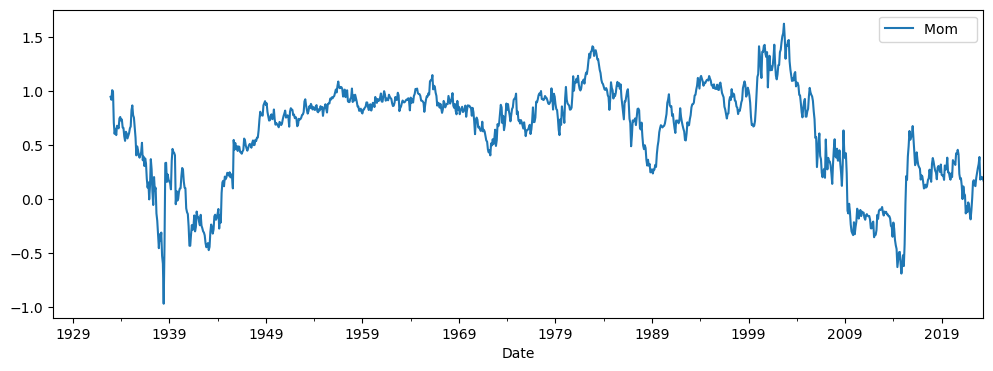

In [10]:
# To plot the momentum factor dataframe
ff_mom_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [11]:
# To combine both data frames to make a dataframe with 4 factors (merge by date)
ff_df
ff_mom_df

# Merging them
import pandas as pd
ffac_merged_df = pd.merge(ff_df,ff_mom_df,on='Date',how='inner',sort=True,copy=True,indicator=False, validate='one_to_one')
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2023-01,6.65,5.02,-4.05,0.35,-15.98
2023-02,-2.58,1.21,-0.78,0.34,0.21
2023-03,2.51,-5.59,-9.01,0.36,-2.50


### 2. Risk Asset Data

In [12]:
# Install Yahoo Finance package to get stock data
!pip install yfinance

In [13]:
import yfinance as yf
yf.pdr_override()

In [14]:
# Getting data for Apple to compare returns on AAPL VS the risk factors
AAPL_data = pandas_datareader.data.get_data_yahoo('AAPL',start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [15]:
AAPL_data

Date
1980-12-31         NaN
1981-01-31   -0.172163
1981-02-28   -0.061943
1981-03-31   -0.075475
1981-04-30    0.158163
                ...   
2023-03-31    0.118649
2023-04-30    0.028987
2023-05-31    0.046058
2023-06-30    0.094330
2023-07-31   -0.004331
Freq: M, Name: Adj Close, Length: 512, dtype: float64

In [16]:
# To get it as a dataframe
AAPL_df = AAPL_data.to_frame()
AAPL_df

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158163
...,...
2023-03-31,0.118649
2023-04-30,0.028987
2023-05-31,0.046058


### 3. Cleaning the Data to Compare Risk

In [17]:
# To check index data type for index (time stamp) VS for risk factors
AAPL_df.index.dtype

dtype('<M8[ns]')

In [18]:
# Data type is a period, which is different from the other database. Cannot merge...
ffac_merged_df.index.dtype

period[M]

In [19]:
# Changing the index in both dataframe
# Change it into a string to then modify it to date form with year and month
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

In [20]:
# To verify changes have been made (it's an object)
AAPL_df.dt_date.dtype

dtype('O')

In [21]:
# Changing the index for the risk factor database
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')

# It is also now an object
ffac_merged_df.dt_date.dtype

dtype('O')

In [22]:
# Merging the dataframes
AAPL_ffac_merge_df = pd.merge(AAPL_df,ffac_merged_df,how='inner',on='dt_date',sort=True,copy=True,indicator=False,validate='one_to_one')
AAPL_ffac_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1980-12-31,1980-12,-4.52,-0.26,2.79,1.31,-6.68,1980-12
1,-0.172163,1981-01-31,1981-01,-5.04,2.92,6.72,1.04,-7.95,1981-01
2,-0.061943,1981-02-28,1981-02,0.57,-0.34,1.02,1.07,-1.35,1981-02
3,-0.075475,1981-03-31,1981-03,3.56,3.54,0.64,1.21,0.74,1981-03
4,0.158163,1981-04-30,1981-04,-2.11,4.40,2.28,1.08,-0.91,1981-04
...,...,...,...,...,...,...,...,...,...
505,0.110521,2023-01-31,2023-01,6.65,5.02,-4.05,0.35,-15.98,2023-01
506,0.023183,2023-02-28,2023-02,-2.58,1.21,-0.78,0.34,0.21,2023-02
507,0.118649,2023-03-31,2023-03,2.51,-5.59,-9.01,0.36,-2.50,2023-03
508,0.028987,2023-04-30,2023-04,0.61,-3.34,-0.03,0.35,1.65,2023-04


In [23]:
# Cleaning the table
# Dropping str_date_x and str_date_y
AAPL_ffac_merge_df.drop(columns=['str_date_x','str_date_y'],inplace=True)

In [24]:
# Rename Adj Close
AAPL_ffac_merge_df.rename(columns={'Adj Close':'AAPL'},inplace=True)

In [25]:
# Better, but AAPL's returns are in % whereas the factors are in % (need to have same units)
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74
4,0.158163,1981-04,-2.11,4.40,2.28,1.08,-0.91
...,...,...,...,...,...,...,...
505,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98
506,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21
507,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50
508,0.028987,2023-04,0.61,-3.34,-0.03,0.35,1.65


In [26]:
# Subtracting the risk-free rate from AAPL returns to get the risk premia
AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100-AAPL_ffac_merge_df['RF']

In [27]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
0,NaN,1980-12,-4.52,-0.26,2.79,1.31,-6.68,NaN
1,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256256
2,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264308
3,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757507
4,0.158163,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736261
...,...,...,...,...,...,...,...,...
505,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98,10.702102
506,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21,1.978308
507,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50,11.504862
508,0.028987,2023-04,0.61,-3.34,-0.03,0.35,1.65,2.548723


In [28]:
# Removing NaN
AAPL_ffac_merge_df.dropna(axis=0,inplace=True)

### 4. Running a Multivariate Regression of Returns of an Asset on a 4-Factor Risk Model

In [44]:
# To check columns in the dataframe
list(AAPL_ffac_merge_df)
# Mom factor has 3 spaces behind it, so rename it

['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'MOM', 'AAPL_RF']

In [45]:
# Renaming MOM factor
AAPL_ffac_merge_df.rename(columns={'Mom   ':'MOM'}, inplace=True)

In [46]:
# Using the OLS regression model
from statsmodels.api import OLS
results = OLS(AAPL_ffac_merge_df['AAPL_RF'],AAPL_ffac_merge_df[['Mkt-RF','SMB','HML','MOM']],missing='drop').fit()

In [47]:
results.summary()
# Does not have an intercept (aka and alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.292
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              52.15
Date:                Thu, 20 Jul 2023   Prob (F-statistic):                    9.09e-37
Time:                        23:58:34   Log-Likelihood:                         -1940.1
No. Observations:                 509   AIC:                                      3888.
Df Residuals:                     505   BIC:                                      3905.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2735      0.114     11.153      0.000       1.049       1.498
SMB            0.2242      0.170      1.317      0.189      -0.110       0.559
HML           -0.8231      0.163     -5.046      0.000      -1.144      -0.503
MOM           -0.0443      0.115     -0.385      0.700      -0.270       0.181
==============================================================================
Omnibus:                       15.638   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.137
Skew:                          -0.054   Prob(JB):                     6.37e-08
Kurtosis:                       4.245   Cond. No.                         1.86
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# To add a constant (the alpha)
import statsmodels.tools
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df,prepend=True)

In [50]:
AAPL_ffac_merge_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
1,1.0,-0.172163,1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256256
2,1.0,-0.061943,1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264308
3,1.0,-0.075475,1981-03,3.56,3.54,0.64,1.21,0.74,-8.757507
4,1.0,0.158163,1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736261
5,1.0,0.167398,1981-05,0.11,2.00,-0.42,1.15,3.70,15.589751
...,...,...,...,...,...,...,...,...,...
505,1.0,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98,10.702102
506,1.0,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21,1.978308
507,1.0,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50,11.504862
508,1.0,0.028987,2023-04,0.61,-3.34,-0.03,0.35,1.65,2.548723


In [54]:
results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'],AAPL_ffac_merge_df_c[['const','Mkt-RF','SMB','HML','MOM']],missing='drop').fit()
results.summary(0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     50.76
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           6.59e-36
Time:                        00:02:20   Log-Likelihood:                -1936.1
No. Observations:                 509   AIC:                             3882.
Df Residuals:                     504   BIC:                             3903.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4253      0.499      2.856      0.004       0.445       2.406
Mkt-RF         1.2085      0.116     10.450      0.000       0.981       1.436
SMB            0.2199      0.169      1.301      0.194      -0.112       0.552
HML           -0.8911      0.164     -5.443      0.000      -1.213      -0.569
MOM           -0.1006      0.116     -0.869      0.385      -0.328       0.127
==============================================================================
Omnibus:                       14.918   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.824
Skew:                          -0.052   Prob(JB):                     2.03e-07
Kurtosis:                       4.201   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Analysis

- The alpha is 1.4253% per month (highly positive and significant)
- Has a significant beta on the market (1.2085 with P-value = 0.000)
- It has an insignificant exposure to size (SMB) with its P-value of 0.112
- It has a negative significant exposure to value (which makes sense since AAPL is a growth stock)
- It has an insignificant exposure to MOM
- Overall, approximately 28.7% of the variability of AAPL's returns is explained, suggesting that there is a rather big idiosyncratic component